In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as web
import itertools
import scipy.stats as stats
import yfinance as yf

In [2]:
end = dt.datetime.now()
start = dt.datetime(2006,1,1)
start, end

(datetime.datetime(2006, 1, 1, 0, 0),
 datetime.datetime(2024, 4, 1, 13, 43, 3, 78362))

In [3]:
stocks = ['QQQ', 'VOO', 'MSFT']
stocks

['QQQ', 'VOO', 'MSFT']

In [4]:
df = yf.download(stocks, start, end)
df.head(1)

[*********************100%%**********************]  3 of 3 completed


Adj Close          Close          High           Low          \
                 MSFT QQQ VOO   MSFT QQQ VOO  MSFT QQQ VOO  MSFT QQQ VOO   
Date                                                                       
2006-01-03  18.959038 NaN NaN  26.84 NaN NaN  27.0 NaN NaN  26.1 NaN NaN   

             Open            Volume          
             MSFT QQQ VOO      MSFT QQQ VOO  
Date                                         
2006-01-03  26.25 NaN NaN  79973000 NaN NaN

In [5]:
df.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2024-03-15', '2024-03-18', '2024-03-19', '2024-03-20',
               '2024-03-21', '2024-03-22', '2024-03-25', '2024-03-26',
               '2024-03-27', '2024-03-28'],
              dtype='datetime64[ns]', name='Date', length=4590, freq=None)

In [7]:
df.columns

MultiIndex([('Adj Close', 'MSFT'),
            ('Adj Close',  'QQQ'),
            ('Adj Close',  'VOO'),
            (    'Close', 'MSFT'),
            (    'Close',  'QQQ'),
            (    'Close',  'VOO'),
            (     'High', 'MSFT'),
            (     'High',  'QQQ'),
            (     'High',  'VOO'),
            (      'Low', 'MSFT'),
            (      'Low',  'QQQ'),
            (      'Low',  'VOO'),
            (     'Open', 'MSFT'),
            (     'Open',  'QQQ'),
            (     'Open',  'VOO'),
            (   'Volume', 'MSFT'),
            (   'Volume',  'QQQ'),
            (   'Volume',  'VOO')],
           )

In [8]:
close = df.loc[:, 'Close']
close

,MSFT,QQQ,VOO
Date,,,
2006-01-03,26.840000,NaN,NaN
2006-01-04,26.969999,NaN,NaN
2006-01-05,26.990000,NaN,NaN
2006-01-06,26.910000,NaN,NaN
2006-01-09,26.860001,NaN,NaN
...,...,...,...
2024-03-22,428.739990,446.380005,479.179993
2024-03-25,422.859985,444.760010,477.940002
2024-03-26,421.649994,443.320007,476.600006


In [9]:
close.describe()

,MSFT,QQQ,VOO
count,4590.000000,3835.000000,3411.000000
mean,99.680233,160.999635,243.137707
std,102.768082,111.837596,99.542320
min,15.150000,25.740000,100.339996
25%,28.402500,66.985001,167.745003
50%,45.389999,115.699997,222.399994
75%,137.779999,236.834999,323.869995
max,429.369995,446.380005,481.350006


In [10]:
close[close.index > end - dt.timedelta(days=100)].describe()

,MSFT,QQQ,VOO
count,65.000000,65.000000,65.000000
mean,402.987231,427.649538,456.433540
std,16.334305,14.160435,15.619664
min,367.750000,396.279999,429.429993
25%,396.510010,416.970001,443.290009
50%,406.220001,430.570007,457.760010
75%,414.920013,438.570007,470.010010
max,429.369995,446.380005,481.350006


In [11]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

pd.options.plotting.backend = 'plotly'
close.plot()

In [ ]:
close['MSFT'].pct_change().plot(kind='hist')

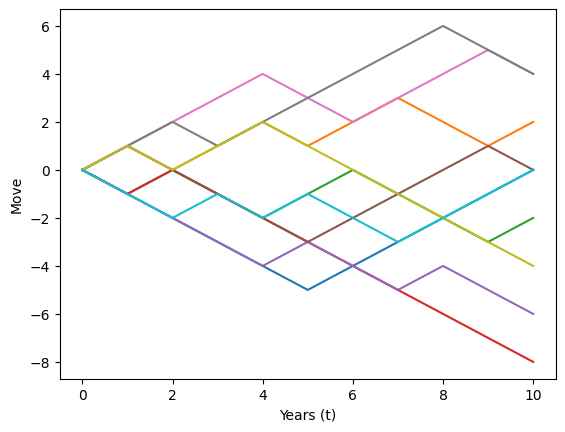

In [ ]:
# brownian motion
m = 10
t = 10
random_walk = [1, -1]
steps = np.random.choice(random_walk, size=(m,t)).T
origin = np.zeros((1,m))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)
plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

# increments between time periods are independent
